In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets

<IPython.core.display.Javascript object>


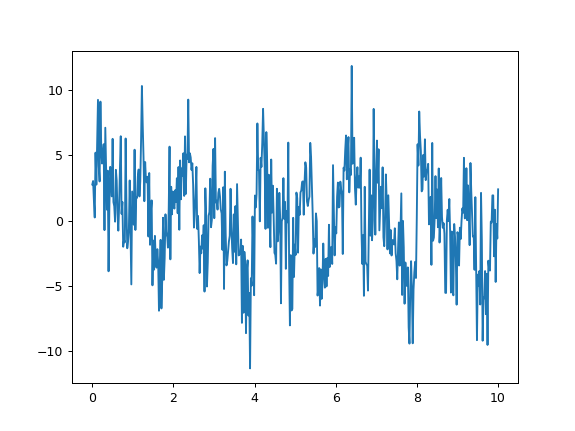

In [14]:
n = 500
x = np.linspace(0, 10, n)
spacing = x[1] - x[0]
noise = np.random.normal(0,0.5,n)

tau = 2*np.pi
y = np.zeros_like(x)
coefs = [(1, 0.2), (2, 0.5), (3, 1), (0.5, 2), (1.75, 1.75)]
for a, f in coefs:
    y += a*np.sin(f*tau*x) + noise

plt.plot(x, y)

251


<IPython.core.display.Javascript object>


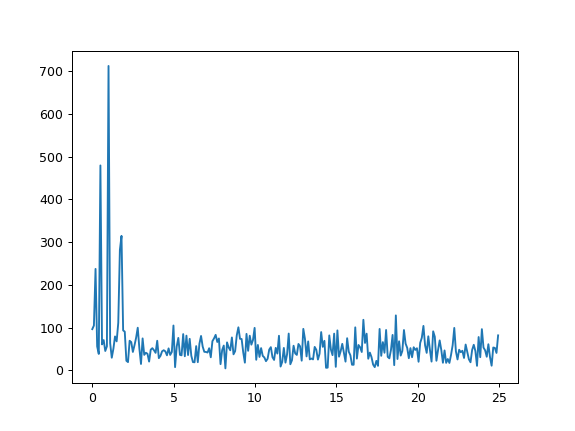

In [15]:
f = np.fft.rfft(y)
freqs = abs(np.fft.fftfreq(n, spacing)[:len(f)])
#f[abs(f) < 100] = 0
print(len(f))
plt.plot(freqs, abs(f))

<IPython.core.display.Javascript object>


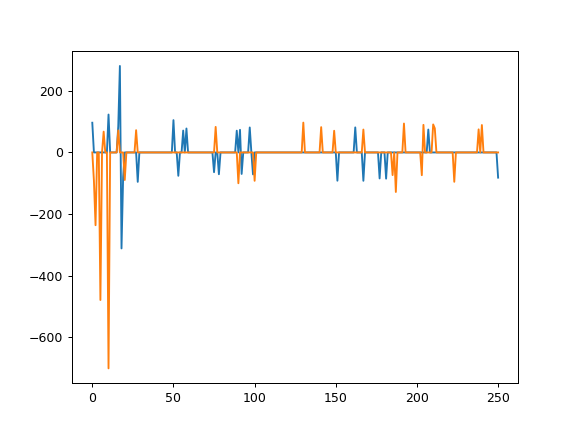

In [16]:
fr = f.real.copy()
fi = f.imag.copy()

sort_fr = np.argsort(abs(fr))
sort_fi = np.argsort(abs(fi))

fr[sort_fr[:-25]] = 0
fi[sort_fi[:-25]] = 0

plt.plot(fr)
plt.plot(fi)

<IPython.core.display.Javascript object>


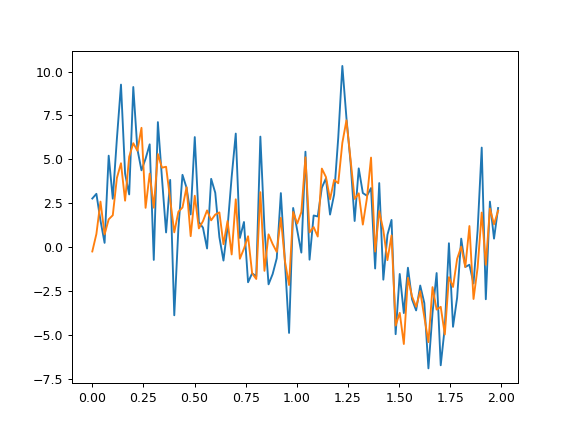

In [17]:
f0 = fr + 1j*fi
z = np.fft.irfft(f0)
low = 0
high = 100
plt.plot(x[low:high], y[low:high])
plt.plot(x[low:high], z[low:high])

# Animation

<IPython.core.display.Javascript object>


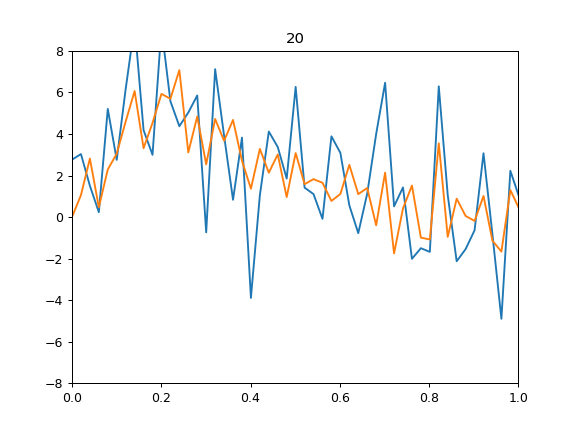

In [18]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-8, 8))

line_og, = ax.plot([], [])
line_fx, = ax.plot([], [])

def init():
    line_og.set_data([], [])
    return (line_og,)

def animate(i):
    fr = f.real.copy()
    fi = f.imag.copy()

    sort_fr = np.argsort(abs(fr))
    sort_fi = np.argsort(abs(fi))

    fr[sort_fr[:-i]] = 0
    fi[sort_fi[:-i]] = 0
    
    f0 = fr + 1j*fi
    z = np.fft.irfft(f0)
    
    line_og.set_data(x, y)
    line_fx.set_data(x, z)
    ax.set_title(i)
    
    return (line_og, line_fx)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, 
                               blit=True)

HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


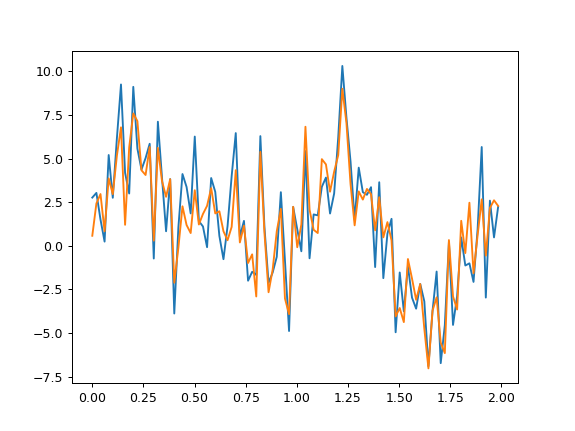

IntSlider(value=5)

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

plotting_data = []
for top in range(101):
    fr = f.real.copy()
    fi = f.imag.copy()

    sort_fr = np.argsort(abs(fr))
    sort_fi = np.argsort(abs(fi))

    fr[sort_fr[:-top]] = 0
    fi[sort_fi[:-top]] = 0
    
    f0 = fr + 1j*fi
    z = np.fft.irfft(f0)
    low = 0
    high = 100
    
    og = (x[low:high], y[low:high])
    fx = (x[low:high], z[low:high])
    
    plotting_data.append((og, fx))

def fourier_plot(top):
    ax.clear()
    og, fx = plotting_data[top]
    ax.plot(*og)
    ax.plot(*fx)
    fig.canvas.draw()

slider = widgets.IntSlider()
top = 5
slider.value = top
def on_change(v):
    top = v['new']
    fourier_plot(top)
    
slider.observe(on_change, names='value')
display(slider)